In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

driver = webdriver.Chrome(service=Service("../driver/chromedriver"))
driver.get("https://www.kobis.or.kr/kobis/business/stat/boxs/findYearlyBoxOfficeList.do")

### 1. 접속, 조회년도 데이터 가져오기

In [2]:
from selenium.webdriver.common.by import By

search_m = driver.find_element(By.ID, "sSearchYearFrom")
search_year_list = search_m.find_elements(By.TAG_NAME, "option")

for idx, y_list  in enumerate(search_year_list):
    print(str(idx)+", "+y_list.get_attribute("value"))

0, 2004
1, 2005
2, 2006
3, 2007
4, 2008
5, 2009
6, 2010
7, 2011
8, 2012
9, 2013
10, 2014
11, 2015
12, 2016
13, 2017
14, 2018
15, 2019
16, 2020
17, 2021
18, 2022
19, 2023
20, 2024


In [3]:
year_list=[y_list.get_attribute("value") for y_list in search_year_list]
year_list

['2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024']

In [4]:

#필요한 데이터만 자르기 (2023-2014)
year_list = year_list[10:]
year_list.remove('2024')
print(len(year_list),year_list)


10 ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [5]:
#조회 버튼
driver.find_element(By.CLASS_NAME,"btn_blue").click()

In [6]:
#확인 
import time
from tqdm.notebook import tqdm

for y_list in tqdm(year_list):
    search_m = driver.find_element(By.ID, "sSearchYearFrom")
    search_m.click()
    search_m.send_keys(y_list)
    driver.find_element(By.CLASS_NAME,"btn_blue").click()
    driver.implicitly_wait(3)

  0%|          | 0/10 [00:00<?, ?it/s]

### 2. 값 뽑아오기 

In [7]:
result = driver.find_element(By.CLASS_NAME,"tbl_comm.th_sort")
movie = result.find_element(By.ID,"td_movie")

rnk = result.find_element(By.ID, "td_rank")
name = movie.find_element(By.CLASS_NAME, "ellip.per90")
date = result.find_element(By.ID, "td_openDt")
sale = result.find_element(By.ID,"td_salesAcc")
audience = result.find_element(By.ID, "td_audiAcc")
screen = result.find_element(By.ID, "td_scrnCnt")
screen_number = result.find_element(By.ID, "td_showCnt")



In [8]:
result = driver.find_element(By.CLASS_NAME,"tbl_comm.th_sort")
rows = result.find_elements(By.TAG_NAME,"tr")[1:]

In [9]:
import re 
from tqdm.notebook import tqdm

movie_chart_data=[]

for y_list in tqdm(year_list):
    search_m = driver.find_element(By.ID, "sSearchYearFrom")
    search_m.click()
    search_m.send_keys(y_list)
    driver.find_element(By.CLASS_NAME,"btn_blue").click()
    driver.implicitly_wait(3)

    result = driver.find_element(By.CLASS_NAME,"tbl_comm.th_sort")
    table = result.find_element(By.TAG_NAME,"tbody")
    rows = table.find_elements(By.TAG_NAME,"tr")


    for row in rows:
        movie = row.find_element(By.ID,"td_movie")
        rnk = row.find_element(By.ID, "td_rank").text
        name = row.find_element(By.CLASS_NAME, "ellip.per90").text
        date = row.find_element(By.ID, "td_openDt").text
        sale = row.find_element(By.ID,"td_salesAcc").text
        audience = row.find_element(By.ID, "td_audiAcc").text
        screen = row.find_element(By.ID, "td_scrnCnt").text
        screen_number = row.find_element(By.ID, "td_showCnt").text
        
        movie_chart = {
            "rank": rnk,
            "name": name,
            "date" : date,
            "sale" : sale,
            "audience" : audience,
            "screen" : screen,
            "screen_number" : screen_number
        }
        
        movie_chart_data.append(movie_chart)
        driver.implicitly_wait(1)

print(len(movie_chart_data), movie_chart_data[3:])




  0%|          | 0/10 [00:00<?, ?it/s]

500 [{'rank': '4', 'name': '해적: 바다로 간 산적', 'date': '2014-08-06', 'sale': '66,370,682,706', 'audience': '8,666,046', 'screen': '910', 'screen_number': '133,350'}, {'rank': '5', 'name': '수상한 그녀', 'date': '2014-01-22', 'sale': '62,705,348,249', 'audience': '8,657,982', 'screen': '1,027', 'screen_number': '136,975'}, {'rank': '6', 'name': '변호인', 'date': '2013-12-18', 'sale': '41,918,383,800', 'audience': '5,687,571', 'screen': '925', 'screen_number': '97,261'}, {'rank': '7', 'name': '국제시장', 'date': '2014-12-17', 'sale': '41,089,567,596', 'audience': '5,345,677', 'screen': '966', 'screen_number': '63,603'}, {'rank': '8', 'name': '트랜스포머: 사라진 시대', 'date': '2014-06-25', 'sale': '44,012,752,845', 'audience': '5,295,836', 'screen': '1,602', 'screen_number': '107,875'}, {'rank': '9', 'name': '군도: 민란의 시대', 'date': '2014-07-23', 'sale': '36,988,022,499', 'audience': '4,774,931', 'screen': '1,394', 'screen_number': '67,237'}, {'rank': '10', 'name': '엣지 오브 투모로우', 'date': '2014-06-04', 'sale': '38,732

In [10]:
driver.quit()

### 3. Pandas로 저장

In [2]:
import pandas as pd 


In [12]:
df = pd.DataFrame(movie_chart_data)
df.head(5)

,rank,name,date,sale,audience,screen,screen_number
0,1,명량,2014-07-30,"135,748,398,910","17,613,682","1,587","188,611"
1,2,겨울왕국,2014-01-16,"82,461,504,400","10,296,101","1,010","157,683"
2,3,인터스텔라,2014-11-06,"80,671,424,300","10,105,247","1,410","166,218"
3,4,해적: 바다로 간 산적,2014-08-06,"66,370,682,706","8,666,046",910,"133,350"
4,5,수상한 그녀,2014-01-22,"62,705,348,249","8,657,982","1,027","136,975"


In [13]:
df.to_csv("movie_chart_all.csv", index=False, encoding="utf-8-sig")

### 3. 데이터 전처리 

#### DATE -> YEAR 

In [14]:
movie = pd.read_csv("movie_chart_all.csv")
movie.head()

,rank,name,date,sale,audience,screen,screen_number
0,1,명량,2014-07-30,"135,748,398,910","17,613,682","1,587","188,611"
1,2,겨울왕국,2014-01-16,"82,461,504,400","10,296,101","1,010","157,683"
2,3,인터스텔라,2014-11-06,"80,671,424,300","10,105,247","1,410","166,218"
3,4,해적: 바다로 간 산적,2014-08-06,"66,370,682,706","8,666,046",910,"133,350"
4,5,수상한 그녀,2014-01-22,"62,705,348,249","8,657,982","1,027","136,975"


In [15]:
movie['date'] = pd.to_datetime(movie['date'], errors='coerce').dt.year

movie.head()


,rank,name,date,sale,audience,screen,screen_number
0,1,명량,2014,"135,748,398,910","17,613,682","1,587","188,611"
1,2,겨울왕국,2014,"82,461,504,400","10,296,101","1,010","157,683"
2,3,인터스텔라,2014,"80,671,424,300","10,105,247","1,410","166,218"
3,4,해적: 바다로 간 산적,2014,"66,370,682,706","8,666,046",910,"133,350"
4,5,수상한 그녀,2014,"62,705,348,249","8,657,982","1,027","136,975"


In [16]:
movie = pd.DataFrame({
    "rank": movie["rank"],
    "name": movie["name"],
    "year": movie["date"],
    "sale": movie["sale"],
    "audience": movie["audience"],
    "screen": movie["screen"],
    "screen_number": movie["screen_number"],
})

movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           500 non-null    int64 
 1   name           500 non-null    object
 2   year           500 non-null    int32 
 3   sale           500 non-null    object
 4   audience       500 non-null    object
 5   screen         500 non-null    object
 6   screen_number  500 non-null    object
dtypes: int32(1), int64(1), object(5)
memory usage: 25.5+ KB


In [17]:
# 매출, 관객, 스크린, 스크린 수에서 , 제거 
movie['sale'] = movie.sale.str.replace(',','')
movie['audience'] = movie.audience.str.replace(',','')
movie['screen'] = movie.screen.str.replace(',','')
movie['screen_number'] = movie.screen_number.str.replace(',','')
movie.head()


,rank,name,year,sale,audience,screen,screen_number
0,1,명량,2014,135748398910,17613682,1587,188611
1,2,겨울왕국,2014,82461504400,10296101,1010,157683
2,3,인터스텔라,2014,80671424300,10105247,1410,166218
3,4,해적: 바다로 간 산적,2014,66370682706,8666046,910,133350
4,5,수상한 그녀,2014,62705348249,8657982,1027,136975


In [18]:
#int로 바꿔주기 

movie=movie.astype(dtype={
                          'sale':'int',
                          'audience':'int',
                          'screen':'int',
                          'screen_number':'int'
                          })

movie.index.name='id'

movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           500 non-null    int64 
 1   name           500 non-null    object
 2   year           500 non-null    int32 
 3   sale           500 non-null    int64 
 4   audience       500 non-null    int64 
 5   screen         500 non-null    int64 
 6   screen_number  500 non-null    int64 
dtypes: int32(1), int64(5), object(1)
memory usage: 25.5+ KB


In [19]:
movie.head()

,rank,name,year,sale,audience,screen,screen_number
id,,,,,,,
0,1,명량,2014,135748398910,17613682,1587,188611
1,2,겨울왕국,2014,82461504400,10296101,1010,157683
2,3,인터스텔라,2014,80671424300,10105247,1410,166218
3,4,해적: 바다로 간 산적,2014,66370682706,8666046,910,133350
4,5,수상한 그녀,2014,62705348249,8657982,1027,136975


In [20]:
movie.to_csv("movie_chart.csv", index=False, encoding="utf-8-sig")

#### 장르 칼럼 추가하고 합쳐주기 

In [21]:
genre_all = pd.read_csv('../data/movie_genre_data.csv')
genre_all.head()

,Unnamed: 0,Name,Year,Genre,Viewers
0,0,7번방의 선물,2013,"['코미디', '드라마']","12,811,206"
1,1,설국열차,2013,"['SF', '액션']","9,349,993"
2,2,관상,2013,"['사극', '드라마']","9,134,238"
3,3,아이언맨 3,2013,"['액션', '어드벤처', 'SF']","9,001,331"
4,4,베를린,2013,['액션'],"7,166,290"


In [22]:
genre = genre_all[genre_all['Year'].between(2014,2023)]

genre
genre.to_csv("genre_2014_2023.csv", index=False, encoding="utf-8-sig")

In [23]:
movie

,rank,name,year,sale,audience,screen,screen_number
id,,,,,,,
0,1,명량,2014,135748398910,17613682,1587,188611
1,2,겨울왕국,2014,82461504400,10296101,1010,157683
2,3,인터스텔라,2014,80671424300,10105247,1410,166218
3,4,해적: 바다로 간 산적,2014,66370682706,8666046,910,133350
4,5,수상한 그녀,2014,62705348249,8657982,1027,136975
...,...,...,...,...,...,...,...
495,46,"오늘 밤, 세계에서 이 사랑이 사라진다 해도",2022,5198084474,514915,402,27669
496,47,3일의 휴가,2023,4835070689,514541,863,31547
497,48,소년들,2023,4470423586,471425,1042,43356


In [24]:
genre = pd.read_csv('/home/lim/dev_ws/eda/data/genre_2014_2023.csv')
genre

,Unnamed: 0,Name,Year,Genre,Viewers
0,50,명량,2014,"['사극', '액션']","17,613,682"
1,51,겨울왕국,2014,"['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']","10,296,101"
2,52,인터스텔라,2014,['SF'],"10,105,247"
3,53,해적: 바다로 간 산적,2014,['어드벤처'],"8,666,046"
4,54,수상한 그녀,2014,['드라마'],"8,657,982"
...,...,...,...,...,...
495,545,"오늘 밤, 세계에서 이 사랑이 사라진다 해도",2023,['멜로/로맨스'],"514,915"
496,546,3일의 휴가,2023,"['판타지', '드라마']","514,541"
497,547,소년들,2023,"['드라마', '범죄']","471,425"
498,548,타이타닉,2023,"['드라마', '멜로/로맨스', '액션']","454,336"


In [25]:
#genre 추가
movie['genre'] = genre['Genre']

movie.head()

,rank,name,year,sale,audience,screen,screen_number,genre
id,,,,,,,,
0,1,명량,2014,135748398910,17613682,1587,188611,"['사극', '액션']"
1,2,겨울왕국,2014,82461504400,10296101,1010,157683,"['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']"
2,3,인터스텔라,2014,80671424300,10105247,1410,166218,['SF']
3,4,해적: 바다로 간 산적,2014,66370682706,8666046,910,133350,['어드벤처']
4,5,수상한 그녀,2014,62705348249,8657982,1027,136975,['드라마']


In [26]:
movie.to_csv("movie_chart.csv", index=False, encoding="utf-8-sig")

### 4. 영화 데이터를 데이터 베이스에 저장

In [3]:
import mysql.connector
from sqlalchemy import create_engine

df = pd.read_csv('movie_chart.csv')
df.index.name = 'id'

mysql_config = {
    "host": "database-1.cvkugmey24at.ap-northeast-2.rds.amazonaws.com",
    "port": 3306,
    "user": "lim",
    "password": "0000",
    "database": "eda_project"
}

engine = create_engine(
    f"mysql+mysqlconnector://{mysql_config['user']}:{mysql_config['password']}@{mysql_config['host']}:{mysql_config['port']}/{mysql_config['database']}"
)

table_name = 'movie' 
df.to_sql(table_name, con=engine, if_exists='replace', index=True)



500

In [ ]:
remote.stop()

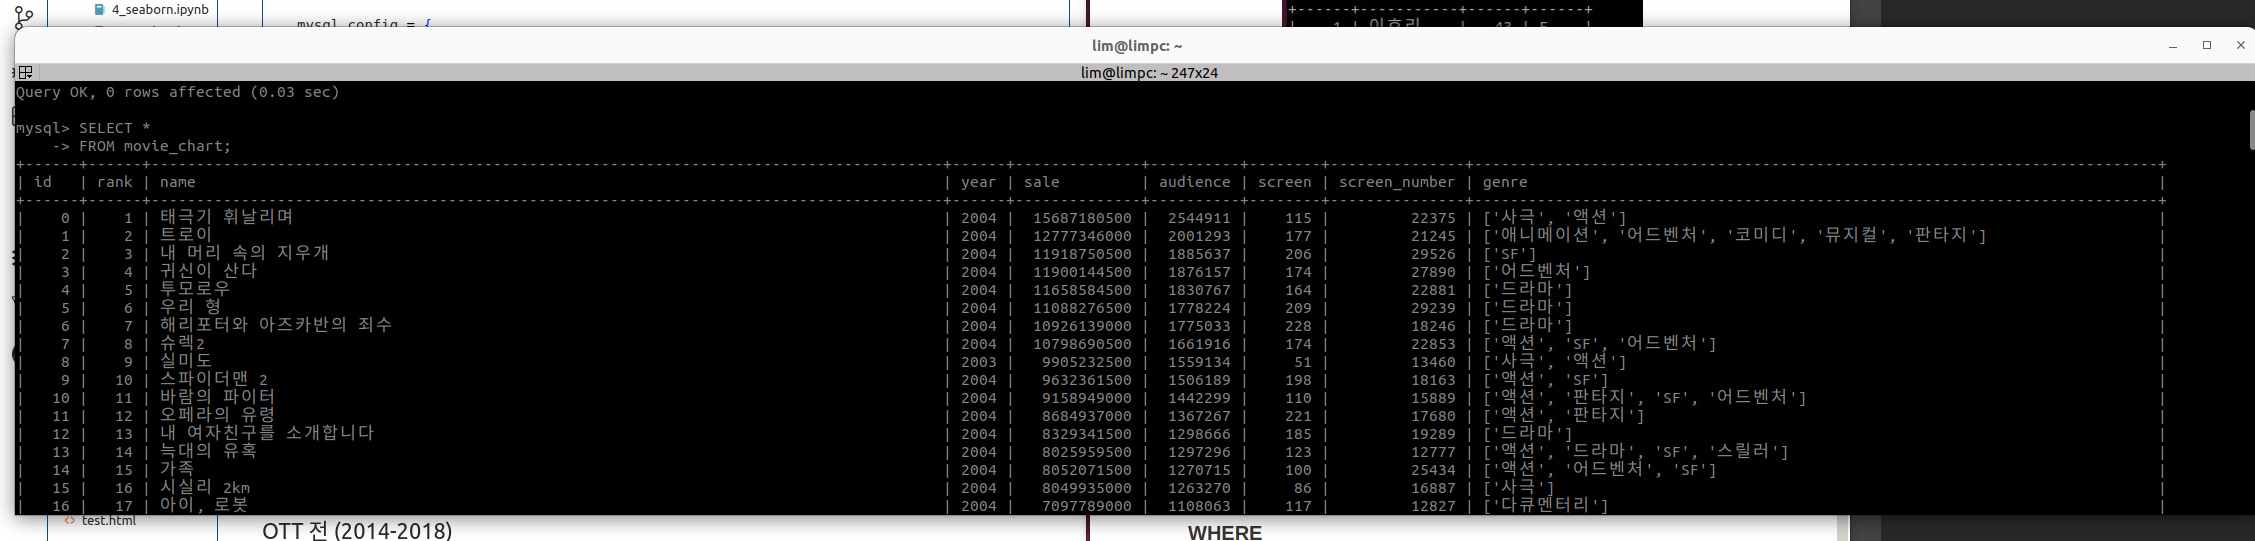

#### OTT 전 (2014-2018)

In [31]:
movie=pd.read_csv('movie_chart.csv')
movie.head()

,rank,name,year,sale,audience,screen,screen_number,genre
0,1,명량,2014,135748398910,17613682,1587,188611,"['사극', '액션']"
1,2,겨울왕국,2014,82461504400,10296101,1010,157683,"['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']"
2,3,인터스텔라,2014,80671424300,10105247,1410,166218,['SF']
3,4,해적: 바다로 간 산적,2014,66370682706,8666046,910,133350,['어드벤처']
4,5,수상한 그녀,2014,62705348249,8657982,1027,136975,['드라마']


In [32]:
movie_before_OTT = movie[movie['year'].between(2014,2018)]
movie_before_OTT.to_csv("movie_before_OTT.csv", index=False, encoding="utf-8-sig")

In [33]:
movie_before_OTT

,rank,name,year,sale,audience,screen,screen_number,genre
0,1,명량,2014,135748398910,17613682,1587,188611,"['사극', '액션']"
1,2,겨울왕국,2014,82461504400,10296101,1010,157683,"['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']"
2,3,인터스텔라,2014,80671424300,10105247,1410,166218,['SF']
3,4,해적: 바다로 간 산적,2014,66370682706,8666046,910,133350,['어드벤처']
4,5,수상한 그녀,2014,62705348249,8657982,1027,136975,['드라마']
...,...,...,...,...,...,...,...,...
247,48,바람 바람 바람,2018,9784385375,1194229,985,57939,['코미디']
248,49,PMC: 더 벙커,2018,9704247367,1179031,1081,26690,['액션']
249,50,범블비,2018,9756083752,1167150,1016,26260,"['액션', '어드벤처', 'SF']"
284,35,아쿠아맨,2018,13659344323,1546297,1158,50500,['액션']


#### OTT 이후 (2019~2023)

In [34]:
movie_after_OTT = movie[movie['year'].between(2019,2023)]
movie_after_OTT.to_csv("movie_after_OTT.csv", index=False, encoding="utf-8-sig")

In [35]:
movie_after_OTT

,rank,name,year,sale,audience,screen,screen_number,genre
250,1,극한직업,2019,139651845516,16265618,2003,292584,['코미디']
251,2,어벤져스: 엔드게임,2019,122181161160,13934399,2835,241979,"['액션', 'SF']"
252,3,겨울왕국 2,2019,111596248720,13369064,2648,282557,['애니메이션']
253,4,알라딘,2019,106955138359,12552283,1409,266469,"['어드벤처', '판타지']"
254,5,기생충,2019,85883963645,10085275,1948,192855,['드라마']
...,...,...,...,...,...,...,...,...
495,46,"오늘 밤, 세계에서 이 사랑이 사라진다 해도",2022,5198084474,514915,402,27669,['멜로/로맨스']
496,47,3일의 휴가,2023,4835070689,514541,863,31547,"['판타지', '드라마']"
497,48,소년들,2023,4470423586,471425,1042,43356,"['드라마', '범죄']"
498,49,타이타닉,2023,6528961730,454336,447,14296,"['드라마', '멜로/로맨스', '액션']"


### 5. 문화산업 현황 데이터 정제 + DB 저장
저장하기 좋게 세로형으로 변환

https://www.index.go.kr/unity/potal/main/EachDtlPageDetail.do?idx_cd=2752

In [85]:
media = pd.read_csv('/home/lim/dev_ws/eda/data/media.csv')
media.head()

,Unnamed: 0,2018,2019,2020,2021,2022
0,NaN,매출액,매출액,매출액,매출액,매출액
1,계,119.6,126.7,128.29,137.51,151.1
2,출판,20.9,21.3,21.65,24.7,25.2
3,만화,1.2,1.3,1.53,2.13,2.6
4,음악,6.1,6.8,6.06,9.37,11


In [86]:
media.columns = ['type', 2018, 2019, 2020, 2021, 2022] 

# 1. 매출액 칼럼 삭제
media = media[1:]
media.head()

,type,2018,2019,2020,2021,2022
1,계,119.6,126.7,128.29,137.51,151.1
2,출판,20.9,21.3,21.65,24.7,25.2
3,만화,1.2,1.3,1.53,2.13,2.6
4,음악,6.1,6.8,6.06,9.37,11
5,게임,14.3,15.6,18.89,20.99,22.2


In [87]:
# 2.  long-form 
media= pd.melt(media, id_vars=['type'], var_name = 'year', value_name='sale' )


In [88]:
media

,type,year,sale
0,계,2018,119.6
1,출판,2018,20.9
2,만화,2018,1.2
3,음악,2018,6.1
4,게임,2018,14.3
5,영화,2018,5.9
6,애니메이션,2018,0.6
7,방송(영상),2018,19.8
8,광고,2018,17.2
9,캐릭터,2018,12.2


In [89]:
#필요없는 항목 제거 
exclude = ['계', '방송(영상)', '광고', '캐릭터', '지식정보','콘텐츠솔루션']
media = media[~media['type'].isin(exclude)]
media

,type,year,sale
1,출판,2018,20.9
2,만화,2018,1.2
3,음악,2018,6.1
4,게임,2018,14.3
5,영화,2018,5.9
6,애니메이션,2018,0.6
13,출판,2019,21.3
14,만화,2019,1.3
15,음악,2019,6.8
16,게임,2019,15.6


In [90]:
media.to_csv("media_data.csv", index=False, encoding="utf-8-sig")

ID 값 추가하기 
고유성 유지하기 위해 값을 추가 
앞에 222이 들어가 세자릿수가 되도록 추가함. (001,002,003...053,054)

In [91]:
media = pd.read_csv("media_data.csv")
media.head()

,type,year,sale
0,출판,2018,20.9
1,만화,2018,1.2
2,음악,2018,6.1
3,게임,2018,14.3
4,영화,2018,5.9


In [92]:
media.loc[:, 'id'] = media.index 
media.loc[:, 'id'] = media['id'].apply(lambda x: f'111{x+1}') 

media

/tmp/ipykernel_6199/3449453502.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1111' '1112' '1113' '1114' '1115' '1116' '1117' '1118' '1119' '11110'
 '11111' '11112' '11113' '11114' '11115' '11116' '11117' '11118' '11119'
 '11120' '11121' '11122' '11123' '11124' '11125' '11126' '11127' '11128'
 '11129' '11130']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  media.loc[:, 'id'] = media['id'].apply(lambda x: f'111{x+1}')


,type,year,sale,id
0,출판,2018,20.90,1111
1,만화,2018,1.20,1112
2,음악,2018,6.10,1113
3,게임,2018,14.30,1114
4,영화,2018,5.90,1115
5,애니메이션,2018,0.60,1116
6,출판,2019,21.30,1117
7,만화,2019,1.30,1118
8,음악,2019,6.80,1119
9,게임,2019,15.60,11110


In [93]:
#순서변경
media = media[['id','type','year','sale']]
media

,id,type,year,sale
0,1111,출판,2018,20.90
1,1112,만화,2018,1.20
2,1113,음악,2018,6.10
3,1114,게임,2018,14.30
4,1115,영화,2018,5.90
5,1116,애니메이션,2018,0.60
6,1117,출판,2019,21.30
7,1118,만화,2019,1.30
8,1119,음악,2019,6.80
9,11110,게임,2019,15.60


In [94]:
media.to_csv("media_data.csv", index=False, encoding="utf-8-sig")

##### 매체데이터 DB 저장

In [95]:
media = pd.read_csv("media_data.csv")

engine = create_engine(
    f"mysql+mysqlconnector://{mysql_config['user']}:{mysql_config['password']}@{mysql_config['host']}:{mysql_config['port']}/{mysql_config['database']}"
)

table_name = 'media' 
media.to_sql(table_name, con=engine, if_exists='replace', index=True)


30

### 6. OTT 데이터 정제 + DB 추가

In [70]:
ott_sale = pd.read_csv("/home/lim/dev_ws/eda/data/OTT_sale.csv")

ott_sale.head()

,name,Unnamed: 1,2019,2020,2021,2022,2023
0,netflix,sale,1859.0,4154,6317,7733,8233
1,wave,sale,973.0,1802,2301,2735,2480
2,tiving,sale,NaN,155,1315,2476,3264
3,watcha,sale,217.0,377,663,592,430
4,Google korea,sale,2124.0,2201,2924,3449,3653


In [71]:
ott_sale.columns = ['name', 'sale',2019, 2020, 2021, 2022, 2023] 
ott_sale.head()

,name,sale,2019,2020,2021,2022,2023
0,netflix,sale,1859.0,4154,6317,7733,8233
1,wave,sale,973.0,1802,2301,2735,2480
2,tiving,sale,NaN,155,1315,2476,3264
3,watcha,sale,217.0,377,663,592,430
4,Google korea,sale,2124.0,2201,2924,3449,3653


In [77]:
exclude = ['tiving']
ott_sale = ott_sale[~ott_sale['name'].isin(exclude)]
ott_sale = ott_sale.drop('sale', axis=1)
ott_sale

,name,2019,2020,2021,2022,2023
0,netflix,1859.0,4154,6317,7733,8233
1,wave,973.0,1802,2301,2735,2480
3,watcha,217.0,377,663,592,430
4,Google korea,2124.0,2201,2924,3449,3653


In [78]:
# long-form 
ott_sale= pd.melt(ott_sale, id_vars=['name'], var_name = 'year', value_name='sale' )
ott_sale.head()

,name,year,sale
0,netflix,2019,1859.0
1,wave,2019,973.0
2,watcha,2019,217.0
3,Google korea,2019,2124.0
4,netflix,2020,4154.0


ID 
2221, 2222.... 이런식

In [111]:
ott_sale.loc[:, 'id'] = ott_sale.index 
ott_sale.loc[:, 'id'] = ott_sale['id'].apply(lambda x: f'222{x+1}') 

ott_sale

/tmp/ipykernel_6199/3310577559.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['2221' '2222' '2223' '2224' '2225' '2226' '2227' '2228' '2229' '22210'
 '22211' '22212' '22213' '22214' '22215' '22216' '22217' '22218' '22219'
 '22220']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ott_sale.loc[:, 'id'] = ott_sale['id'].apply(lambda x: f'222{x+1}')


,name,year,sale,id
0,netflix,2019,1859.0,2221
1,wave,2019,973.0,2222
2,watcha,2019,217.0,2223
3,Google korea,2019,2124.0,2224
4,netflix,2020,4154.0,2225
5,wave,2020,1802.0,2226
6,watcha,2020,377.0,2227
7,Google korea,2020,2201.0,2228
8,netflix,2021,6317.0,2229
9,wave,2021,2301.0,22210


In [97]:
ott_sale.to_csv("ott_sale.csv", index=False, encoding="utf-8-sig")

#### OTT_TAKE -매출이익 정리

In [108]:
ott_take = pd.read_csv("/home/lim/dev_ws/eda/data/OTT_take.csv")
ott_take.head()

,name,2019,2020,2021,2022,2023
0,netflix,22,88,171,143,121
1,wave,-137,-169,-558,-1213,-791
2,watcha,-92,-126,-197,-454,-221
3,Google korea,102,156,294,278,234


In [109]:
ott_take.columns = ['name',2019, 2020, 2021, 2022, 2023] 
ott_take.head()

,name,2019,2020,2021,2022,2023
0,netflix,22,88,171,143,121
1,wave,-137,-169,-558,-1213,-791
2,watcha,-92,-126,-197,-454,-221
3,Google korea,102,156,294,278,234


In [110]:
# long-form 
ott_take= pd.melt(ott_take, id_vars=['name'], var_name = 'year', value_name='take' )
ott_take.head()

,name,year,take
0,netflix,2019,22
1,wave,2019,-137
2,watcha,2019,-92
3,Google korea,2019,102
4,netflix,2020,88


두 데이터 합쳐주기

In [112]:
#take 추가
ott_sale['take'] = ott_take['take']

ott_sale.head()

,name,year,sale,id,take
0,netflix,2019,1859.0,2221,22
1,wave,2019,973.0,2222,-137
2,watcha,2019,217.0,2223,-92
3,Google korea,2019,2124.0,2224,102
4,netflix,2020,4154.0,2225,88


In [114]:
ott_sale = ott_sale[['id','name','year','sale', 'take']]
ott_sale

,id,name,year,sale,take
0,2221,netflix,2019,1859.0,22
1,2222,wave,2019,973.0,-137
2,2223,watcha,2019,217.0,-92
3,2224,Google korea,2019,2124.0,102
4,2225,netflix,2020,4154.0,88
5,2226,wave,2020,1802.0,-169
6,2227,watcha,2020,377.0,-126
7,2228,Google korea,2020,2201.0,156
8,2229,netflix,2021,6317.0,171
9,22210,wave,2021,2301.0,-558


In [115]:
ott_sale.to_csv("ott.csv", index=False, encoding="utf-8-sig")

In [116]:
ott = pd.read_csv("ott.csv")

engine = create_engine(
    f"mysql+mysqlconnector://{mysql_config['user']}:{mysql_config['password']}@{mysql_config['host']}:{mysql_config['port']}/{mysql_config['database']}"
)

table_name = 'ott' 
ott.to_sql(table_name, con=engine, if_exists='replace', index=True)

20

### 7. 스크린 데이터 정제 + DB 추가

In [8]:
#2014-2018
screenA = pd.read_csv('/home/lim/dev_ws/eda/data/movie(2014~2018).csv')
screenA.head()

,영화 제목,상영타입,스크린수,상영횟수,누적매출액(점유율),누적관객수(점유율)
0,명량,필름,1,5,"133,000(0.0%)",17(0.0%)
1,명량,디지털,"2,145","187,193","135,269,836,010(99.6%)","17,552,919(99.6%)"
2,명량,디지털 영문자막,30,85,"40,515,300(0.0%)","5,068(0.0%)"
3,명량,4D,20,"1,379","428,484,000(0.3%)","52,742(0.3%)"
4,명량,디지털 가치봄,48,68,"23,547,000(0.0%)","5,625(0.0%)"


In [9]:
#2019-2023
screenB = pd.read_csv('/home/lim/dev_ws/eda/data/movie(2019~2023).csv')
screenB.head()

,영화 제목,상영타입,스크린수,상영횟수,누적매출액(점유율),누적관객수(점유율)
0,극한직업,디지털,"2,853","292,735","139,639,103,516(100.0%)","16,262,992(100.0%)"
1,극한직업,디지털 영문자막,1,1,"6,000(0.0%)",1(0.0%)
2,극한직업,디지털 가치봄,61,82,"18,050,000(0.0%)","3,493(0.0%)"
3,어벤져스: 엔드게임,디지털,"2,910","232,605","106,300,879,170(86.8%)","12,773,929(91.4%)"
4,어벤져스: 엔드게임,4D,50,"6,819","3,983,260,500(3.3%)","380,194(2.7%)"


In [10]:
screen = pd.concat([screenA,screenB], ignore_index = True)

In [11]:
screen

,영화 제목,상영타입,스크린수,상영횟수,누적매출액(점유율),누적관객수(점유율)
0,명량,필름,1,5,"133,000(0.0%)",17(0.0%)
1,명량,디지털,"2,145","187,193","135,269,836,010(99.6%)","17,552,919(99.6%)"
2,명량,디지털 영문자막,30,85,"40,515,300(0.0%)","5,068(0.0%)"
3,명량,4D,20,"1,379","428,484,000(0.3%)","52,742(0.3%)"
4,명량,디지털 가치봄,48,68,"23,547,000(0.0%)","5,625(0.0%)"
...,...,...,...,...,...,...
1539,타이타닉,4D,12,"1,207","889,682,000(7.8%)","75,429(8.5%)"
1540,타이타닉,3D 디지털,846,"22,427","8,429,304,840(73.7%)","654,868(74.1%)"
1541,타이타닉,IMAX 3D,24,910,"1,492,293,000(13.1%)","83,245(9.4%)"
1542,타이타닉,DOLBYCINEMA 3D,5,114,"186,054,390(1.6%)","9,998(1.1%)"


In [12]:
screen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544 entries, 0 to 1543
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   영화 제목       1544 non-null   object
 1   상영타입        1544 non-null   object
 2   스크린수        1544 non-null   object
 3   상영횟수        1544 non-null   object
 4   누적매출액(점유율)  1544 non-null   object
 5   누적관객수(점유율)  1544 non-null   object
dtypes: object(6)
memory usage: 72.5+ KB


In [13]:
#칼럼명 다듬기 
screen.columns = ['name', 'screen_type', 'screen', 'screening', 'sale', 'audience']

In [14]:
screen.head()

,name,screen_type,screen,screening,sale,audience
0,명량,필름,1,5,"133,000(0.0%)",17(0.0%)
1,명량,디지털,"2,145","187,193","135,269,836,010(99.6%)","17,552,919(99.6%)"
2,명량,디지털 영문자막,30,85,"40,515,300(0.0%)","5,068(0.0%)"
3,명량,4D,20,"1,379","428,484,000(0.3%)","52,742(0.3%)"
4,명량,디지털 가치봄,48,68,"23,547,000(0.0%)","5,625(0.0%)"


In [15]:
# , 제거 
screen['screen'] = screen.screen.str.replace(',','')
screen['screening'] = screen.screening.str.replace(',','')
screen['sale'] = screen.sale.str.replace(',','')
screen['audience'] = screen.audience.str.replace(',','')

screen.head()

,name,screen_type,screen,screening,sale,audience
0,명량,필름,1,5,133000(0.0%),17(0.0%)
1,명량,디지털,2145,187193,135269836010(99.6%),17552919(99.6%)
2,명량,디지털 영문자막,30,85,40515300(0.0%),5068(0.0%)
3,명량,4D,20,1379,428484000(0.3%),52742(0.3%)
4,명량,디지털 가치봄,48,68,23547000(0.0%),5625(0.0%)


In [16]:
#(n.n%) 제거 
screen['sale'] = screen['sale'].str.replace(r'\(.*?\)', '', regex=True).str.strip()
screen['audience'] = screen['audience'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

screen.head()

,name,screen_type,screen,screening,sale,audience
0,명량,필름,1,5,133000,17
1,명량,디지털,2145,187193,135269836010,17552919
2,명량,디지털 영문자막,30,85,40515300,5068
3,명량,4D,20,1379,428484000,52742
4,명량,디지털 가치봄,48,68,23547000,5625


In [17]:
#데이터 타입 바꾸기 
screen=screen.astype(dtype={
                          'screen':'int',
                          'screening':'int',
                          'sale':'int',
                          'audience':'int'
                          })

screen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544 entries, 0 to 1543
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         1544 non-null   object
 1   screen_type  1544 non-null   object
 2   screen       1544 non-null   int64 
 3   screening    1544 non-null   int64 
 4   sale         1544 non-null   int64 
 5   audience     1544 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 72.5+ KB


In [18]:
screen.to_csv("screen.csv", index=False, encoding="utf-8-sig")

In [19]:
#년도 데이터를 추가하기 위해 이전에 사용한 데이터 불러옴
year_add_data = pd.read_csv('/home/lim/dev_ws/eda/data/movie_genre_data.csv')
year_add_data.head()

,Unnamed: 0,Name,Year,Genre,Viewers
0,0,7번방의 선물,2013,"['코미디', '드라마']","12,811,206"
1,1,설국열차,2013,"['SF', '액션']","9,349,993"
2,2,관상,2013,"['사극', '드라마']","9,134,238"
3,3,아이언맨 3,2013,"['액션', '어드벤처', 'SF']","9,001,331"
4,4,베를린,2013,['액션'],"7,166,290"


In [20]:
year_add_data = year_add_data[year_add_data['Year'].between(2014,2023)]

year_add_data

,Unnamed: 0,Name,Year,Genre,Viewers
50,50,명량,2014,"['사극', '액션']","17,613,682"
51,51,겨울왕국,2014,"['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']","10,296,101"
52,52,인터스텔라,2014,['SF'],"10,105,247"
53,53,해적: 바다로 간 산적,2014,['어드벤처'],"8,666,046"
54,54,수상한 그녀,2014,['드라마'],"8,657,982"
...,...,...,...,...,...
545,545,"오늘 밤, 세계에서 이 사랑이 사라진다 해도",2023,['멜로/로맨스'],"514,915"
546,546,3일의 휴가,2023,"['판타지', '드라마']","514,541"
547,547,소년들,2023,"['드라마', '범죄']","471,425"
548,548,타이타닉,2023,"['드라마', '멜로/로맨스', '액션']","454,336"


In [21]:
screen_data = screen.merge(year_add_data[['Name', 'Year']], left_on='name', right_on='Name', how='left')
screen_data.drop(columns=['Name'], inplace=True)

screen_data

,name,screen_type,screen,screening,sale,audience,Year
0,명량,필름,1,5,133000,17,2014
1,명량,디지털,2145,187193,135269836010,17552919,2014
2,명량,디지털 영문자막,30,85,40515300,5068,2014
3,명량,4D,20,1379,428484000,52742,2014
4,명량,디지털 가치봄,48,68,23547000,5625,2014
...,...,...,...,...,...,...,...
1675,타이타닉,4D,12,1207,889682000,75429,2023
1676,타이타닉,3D 디지털,846,22427,8429304840,654868,2023
1677,타이타닉,IMAX 3D,24,910,1492293000,83245,2023
1678,타이타닉,DOLBYCINEMA 3D,5,114,186054390,9998,2023


ID 추가 
3331,3332...

In [22]:
screen_data.loc[:, 'id'] = screen_data.index 
screen_data.loc[:, 'id'] = screen_data['id'].apply(lambda x: f'333{x+1}') 

screen_data

/tmp/ipykernel_18544/3440455508.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['3331' '3332' '3333' ... '3331678' '3331679' '3331680']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  screen_data.loc[:, 'id'] = screen_data['id'].apply(lambda x: f'333{x+1}')


,name,screen_type,screen,screening,sale,audience,Year,id
0,명량,필름,1,5,133000,17,2014,3331
1,명량,디지털,2145,187193,135269836010,17552919,2014,3332
2,명량,디지털 영문자막,30,85,40515300,5068,2014,3333
3,명량,4D,20,1379,428484000,52742,2014,3334
4,명량,디지털 가치봄,48,68,23547000,5625,2014,3335
...,...,...,...,...,...,...,...,...
1675,타이타닉,4D,12,1207,889682000,75429,2023,3331676
1676,타이타닉,3D 디지털,846,22427,8429304840,654868,2023,3331677
1677,타이타닉,IMAX 3D,24,910,1492293000,83245,2023,3331678
1678,타이타닉,DOLBYCINEMA 3D,5,114,186054390,9998,2023,3331679


In [25]:
screen_data = screen_data[['id','name', 'Year', 'screen_type', 'screening', 'sale', 'audience']]

In [26]:
screen_data

,id,name,Year,screen_type,screening,sale,audience
0,3331,명량,2014,필름,5,133000,17
1,3332,명량,2014,디지털,187193,135269836010,17552919
2,3333,명량,2014,디지털 영문자막,85,40515300,5068
3,3334,명량,2014,4D,1379,428484000,52742
4,3335,명량,2014,디지털 가치봄,68,23547000,5625
...,...,...,...,...,...,...,...
1675,3331676,타이타닉,2023,4D,1207,889682000,75429
1676,3331677,타이타닉,2023,3D 디지털,22427,8429304840,654868
1677,3331678,타이타닉,2023,IMAX 3D,910,1492293000,83245
1678,3331679,타이타닉,2023,DOLBYCINEMA 3D,114,186054390,9998


In [27]:
screen_data.to_csv("screen.csv", index=False, encoding="utf-8-sig")

DB 추가 

In [30]:
screen_data= pd.read_csv("screen.csv")

engine = create_engine(
    f"mysql+mysqlconnector://{mysql_config['user']}:{mysql_config['password']}@{mysql_config['host']}:{mysql_config['port']}/{mysql_config['database']}"
)

table_name = 'screen' 
screen_data.to_sql(table_name, con=engine, if_exists='replace', index=True)

1680

### 8. 공연 티켓 판매량 정제 + DB 저장

In [37]:
performance_data = pd.read_csv("/home/lim/dev_ws/eda/data/performance_data.csv")
performance_data

,year,sale
0,2020,236320.200
1,2021,391433.300
2,2022,996243.800
3,2023,1310570.868


ID  추가
444

In [38]:
performance_data.loc[:, 'id'] = performance_data.index 
performance_data.loc[:, 'id'] = performance_data['id'].apply(lambda x: f'444{x+1}') 
performance_data

/tmp/ipykernel_18544/2742031035.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4441' '4442' '4443' '4444']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  performance_data.loc[:, 'id'] = performance_data['id'].apply(lambda x: f'444{x+1}')


,year,sale,id
0,2020,236320.200,4441
1,2021,391433.300,4442
2,2022,996243.800,4443
3,2023,1310570.868,4444


In [40]:
performance_data = performance_data[['id', 'year', 'sale']]
performance_data

,id,year,sale
0,4441,2020,236320.200
1,4442,2021,391433.300
2,4443,2022,996243.800
3,4444,2023,1310570.868


In [41]:
performance_data.to_csv("performance.csv", index=False, encoding="utf-8-sig")

In [42]:
performance_data= pd.read_csv("performance.csv")

engine = create_engine(
    f"mysql+mysqlconnector://{mysql_config['user']}:{mysql_config['password']}@{mysql_config['host']}:{mysql_config['port']}/{mysql_config['database']}"
)

table_name = 'performance' 
performance_data.to_sql(table_name, con=engine, if_exists='replace', index=True)

4

### 9. SQL 연결 종료

In [43]:
engine.dispose()